In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("/content/train.csv")
df['date'] = pd.to_datetime(df['date'])
df.shape

(26298, 6)

In [4]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [5]:
df.groupby(['country', 'store', 'product'])['num_sold'].count()

country  store       product       
Finland  KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Norway   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Sweden   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Name: num_sold, dtype: int64

In [6]:
df.isnull().sum()

row_id      0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [7]:
df['date'].unique()

array(['2015-01-01', '2015-01-02', '2015-01-03', ..., '2018-12-29',
       '2018-12-30', '2018-12-31'], dtype=object)

In [8]:
products = df['product'].unique()
countries = df['country'].unique()
stores = df['store'].unique()

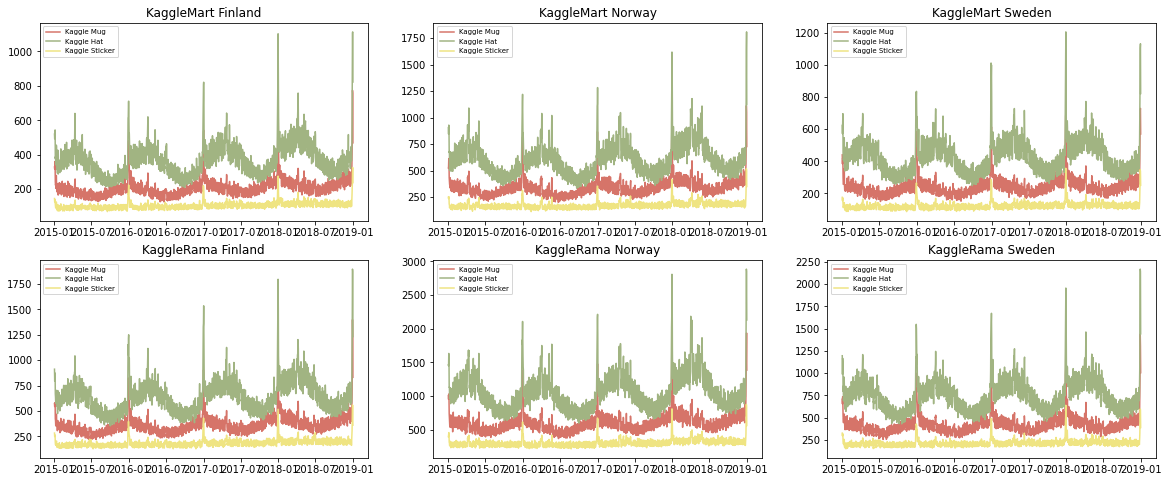

In [34]:
pagoda = ["#D67469",  "#A1B482", '#EFE482']

fig, axs = plt.subplots(len(stores),len(countries), figsize = (20,8))
i=0
j=0
for s in stores:
    for c in countries:
        for k,p in enumerate(products):
            df1 = df.loc[(df['country'] == c) & (df['product'] == p) & (df['store'] == s)]
            y = df1['num_sold']
            x = pd.to_datetime(df1['date'])
            axs[i,j].plot(x, y,color = pagoda[k])
            axs[i,j].set_title(s + " " + c)
            axs[i,j].legend([x for x in products], loc='upper left', fontsize=7)
        j += 1   
    i +=1
    j = 0

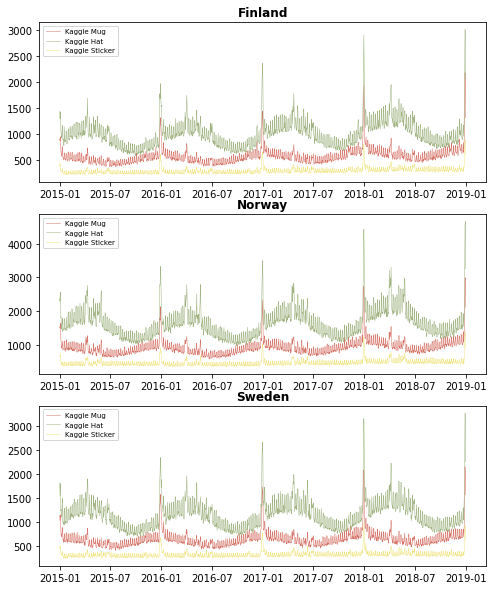

In [29]:
# Country/Product Sales

country_gr = df.groupby(['date', 'country', 'product'])['num_sold'].sum().reset_index()

fig, axes = plt.subplots(3,1, figsize=(8,10))

for i,c in enumerate(countries):
    ax = axes[i]
    for j,p in enumerate(products):
        df1 = country_gr[(country_gr['country']== c) & (country_gr['product']==p)]
        ax.plot(df1['date'], df1['num_sold'], marker='', linewidth=0.5, color = pagoda[j])
        ax.legend([x for x in products], loc='upper left', fontsize=7)
        ax.set_title(c, fontweight='bold')

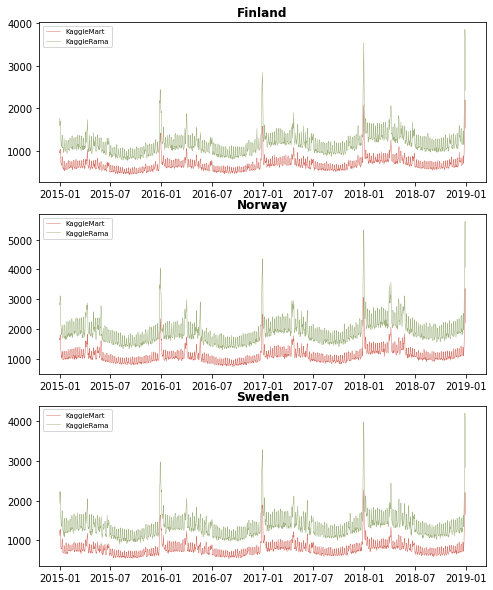

In [30]:
# Country/Store Sales

store_gr = df.groupby(['date', 'country', 'store'])['num_sold'].sum().reset_index()

fig, axes = plt.subplots(3,1, figsize=(8,10))

pagoda = ["#D67469",  "#A1B482", '#EFE482']

for i,c in enumerate(countries):
    ax = axes[i]
    for j,s in enumerate(stores):
        df1 = store_gr[(store_gr['country']== c) & (store_gr['store']==s)]
        ax.plot(df1['date'], df1['num_sold'], marker='', linewidth=0.5, color = pagoda[j])
        ax.legend([x for x in stores], loc='upper left', fontsize=7)
        ax.set_title(c, fontweight='bold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


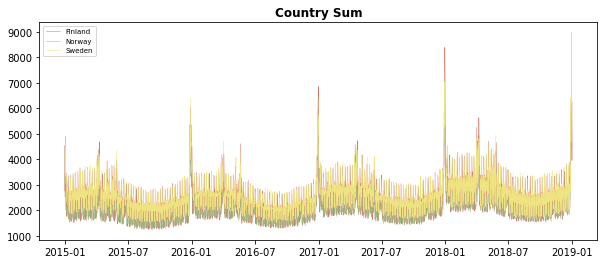

In [43]:
# Country-based Sales

gr = df.groupby(['date', 'country'])['num_sold'].sum().reset_index()
fig, axes = plt.subplots(1,1, figsize=(10,4))
for i,c in enumerate(countries):
    df1 = gr[(store_gr['country']== c) ]
    plt.plot(df1['date'], df1['num_sold'], marker='', linewidth=0.5, color = pagoda[i])
    plt.legend([x for x in countries], loc='upper left', fontsize=7)
    plt.title("Country Sum", fontweight='bold')

### Conclusions
1. Kaggle Hat is the most sold, followed by Kaggle Mug and Kaggle Sticker. This happened consistently in every existing countries.
2. KaggleRama consistently sold more products than KaggleMart in every countries.
3. Every countries sold more-or-less the same amount of products each day.